### We look through the telemetry topics (44 of them in the binary file)
Data we use are same as a01_OL_stroke.ipynb, taken on Thursday night (3/4/20)

In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
start = Time('2020-03-05T22:27:00') #this is UTC
end = Time('2020-03-05T22:38:00') 

In [3]:
mat = scipy.io.loadmat('mat/0305/CellTelemetry_2020-03-05_203926_002.mat')
print(mat['data'].dtype.names)
mdata = mat['data']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}
t = [datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']]
t = np.array([ti+ timedelta(hours=4, minutes=3, seconds=-5) for ti in t]) #convert to utc, 4 hours ahead of Rochester
columns = [n for n, v in ndata.items()]
nonHP = [i for i in range(78) if i+1 not in ndata['hp'][0,:]]
nonHPa = [i for i in range(72) if i+1 not in ndata['hp'][0,:]] #a for axial actuator only

def insertHPColumns(a):
    [n1, n2] = a.shape
    b = np.zeros((n1, n2+6))
    ii = 0
    for i in range(n2+6):
        if i in nonHP:
            b[:,i] = a[:,ii]
            ii += 1
        else:
            b[:,i] = 0
    return b

ndata['f_hp'] = insertHPColumns(ndata['f_hp'])
ndata['f_error'] = insertHPColumns(ndata['f_error'])

('time_delta', 'comm_cntr', 'ilc_status', 'encoder', 'force', 'disp_sensors', 'temp_sensors', 'inclinometer', 'step_cmd', 'inc_cal', 'elevation_ts_i', 'elevation_ts_u', 'elevation_ang', 'el_status', 'disp_proc', 'disp_status', 'temp_proc', 'temp_status', 'hp', 'f_e', 'f_0', 'f_a', 'f_f', 'T_u', 'T_x', 'T_y', 'T_r', 'f_hp', 'f_cmd', 'f_error', 'f_delta', 'f_cmd_wrd', 'mtr_voltage', 'comm_voltage', 'mtr_current', 'comm_current', 'dig_input', 'dig_output', 'mtr_voltage_proc', 'comm_voltage_proc', 'mtr_current_proc', 'comm_current_proc', 'time', 'timestamp')


In [4]:
#This starting time is now consistent with binary file name as well
t[0]

datetime.datetime(2020, 3, 5, 22, 19, 27, 730000)

In [5]:
nn = len(t)
print('%d, time duration = %.0f minutes'%(nn, nn/20/60))

59999, time duration = 50 minutes


In [6]:
# cut out only the time period we are interested in
idx = (t>start) & (t<end)
data = {}
for n, v in ndata.items():
    if len(v.shape)>1:
        data[n] = v[idx,:]
    else:
        data[n] = v[idx]
t = t[idx]

### We will next examine all telemetry topics
For our understanding of the force components (unrelated to the LUT), please see a01_OL_stroke.ipynb

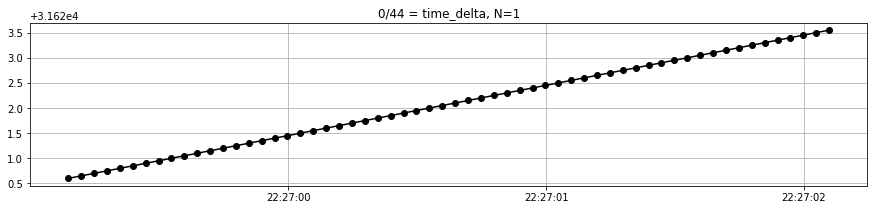

In [7]:
tt = range(200)
ttt = range(60)
it = 0
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt],'-ko')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()

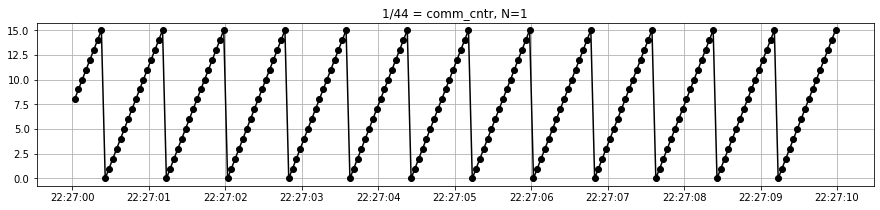

In [8]:
it = 1
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[tt], data[columns[it]][tt],'-ko')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()

In [9]:
for i in data['comm_cntr'][8:25]:
    print('%08s'%bin(i[0])[2:])
#this makes sure there is no problem communicating with ILC. If there is a deviation from this, there is a problem.

       0
       1
      10
      11
     100
     101
     110
     111
    1000
    1001
    1010
    1011
    1100
    1101
    1110
    1111
       0


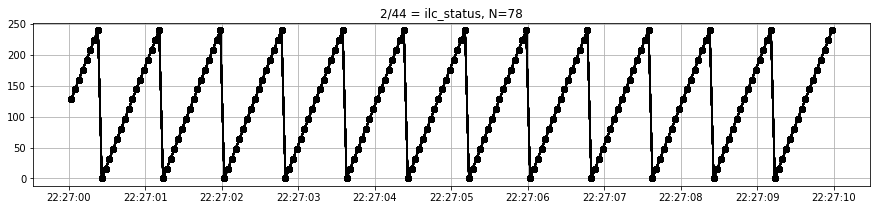

In [10]:
it = 2
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[tt], data[columns[it]][tt],'-ko')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()

In [11]:
for i in data['ilc_status'][8:25]:
    print('%3d,  %10s'%(i[0], bin(i[0])[2:]))
#ilc_status is a 8-bit mask. It goes from 0 - 2**8, 
#last 4-bits (on the right) indicate ILC status
#first 4-bits (on the left) should be same as comm_cntr, otherwise it indicates interference or electrical problems.

  0,           0
 16,       10000
 32,      100000
 48,      110000
 64,     1000000
 80,     1010000
 96,     1100000
112,     1110000
128,    10000000
144,    10010000
160,    10100000
176,    10110000
192,    11000000
208,    11010000
224,    11100000
240,    11110000
  0,           0


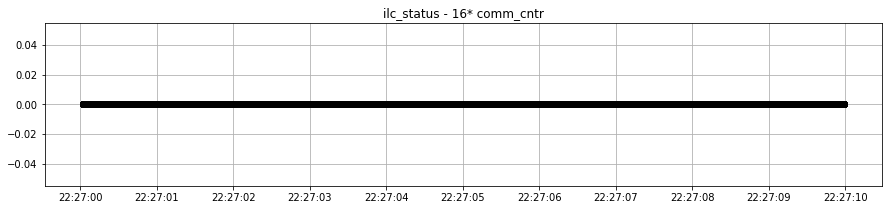

In [12]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[tt], data['ilc_status'][tt] - 2**4* data['comm_cntr'][tt],'-ko')
plt.title('ilc_status - 16* comm_cntr')
plt.grid()

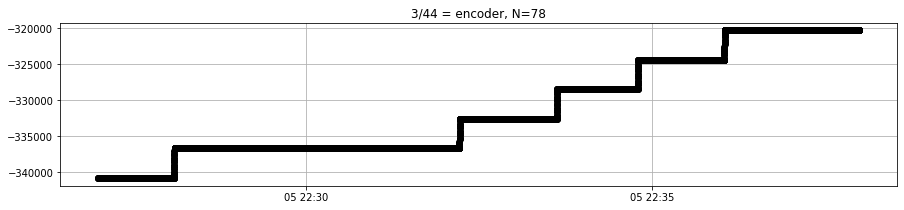

In [13]:
it = 3
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[:], data[columns[it]][:,0],'-ko')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()

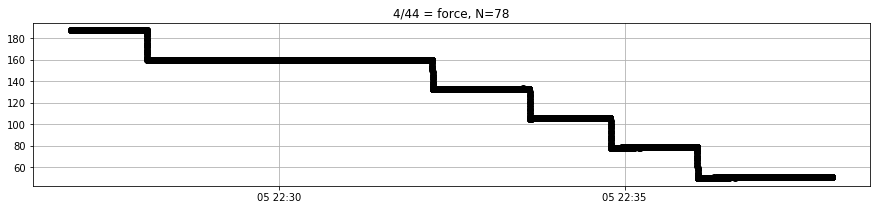

In [15]:
it = 4
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[:], data[columns[it]][:,0],'-ko')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()
#when force decreases, encoder reading increases. Will that still be true when M2 face up?
# does positive force mean actuator is pulling?

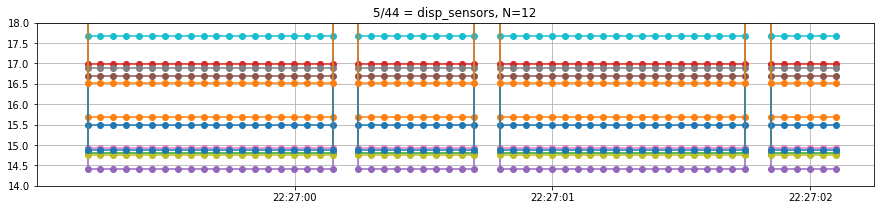

In [16]:
it = 5
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt,:],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.ylim([14,18])
plt.grid()
#disp sensors, what are the locations. Does the offset mean anything? or just they are calibrated differently?

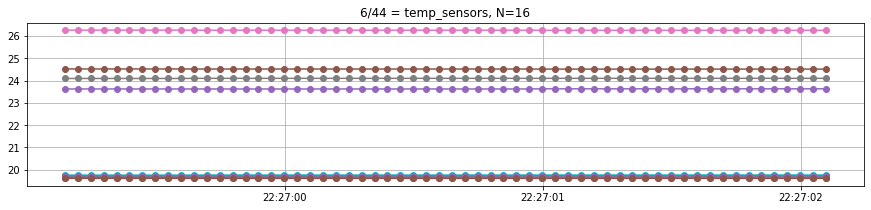

In [17]:
it = 6
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt,:],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()
#temp sensors, what are the locations? what is the accuracy? is the difference real? does it make sense?
# 03_M2_correctability_analysis.pdf and M2_temperature_correction_force_calculation.pdf seem to contradict each other.

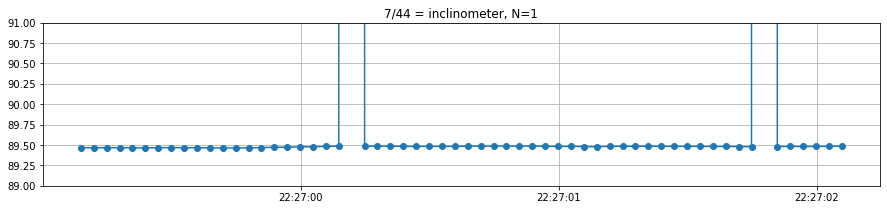

In [18]:
it = 7
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt,:],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.ylim([89,91])
plt.grid()
#why doesn't inclinometer give invalid reading so frequently?

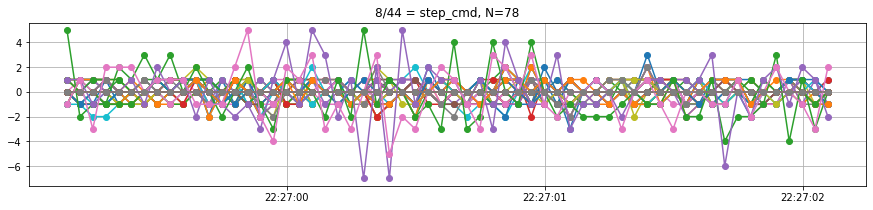

In [19]:
it = 8
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt,:],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()
#what are these step commands? Even in Open loop, the forces keep updating, because of FB?

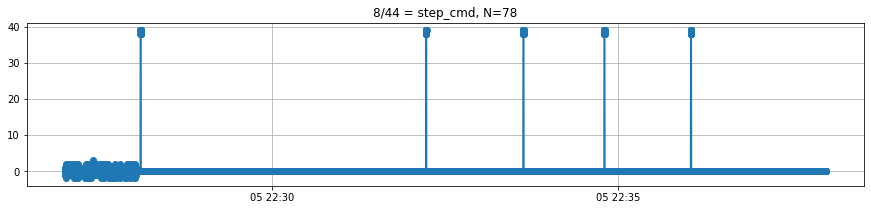

In [20]:
# Now look at B1 only.
it = 8
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]][:,0],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()
#what are these step commands? The actual steps change by much more than these.

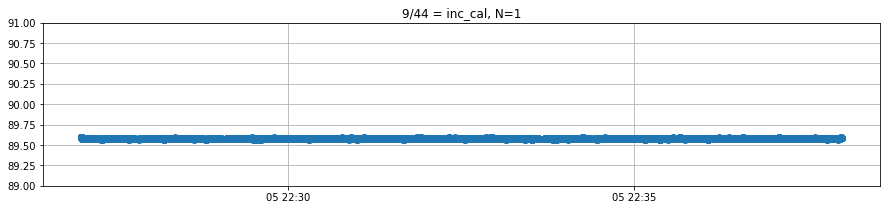

In [21]:
it = 9
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]]/np.pi*180,'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.ylim([89,91])
plt.grid()
#after calibration, we get rid of the bad values. 
#But why are we systematically larger than the un-calibrated values by ~0.07 deg?
#(it looks like both calibrated and raw elevation angles are displayed on GUI. We should get rid of the raw values?)

### inc_cal vs inclinometer
* inc_cal is slightly larger than inclinometer. 
* inc_cal is in radian.
* inc_cal got rid of the unphyisically large values
### On the angle received from DDS, why do we have 3 versions below?

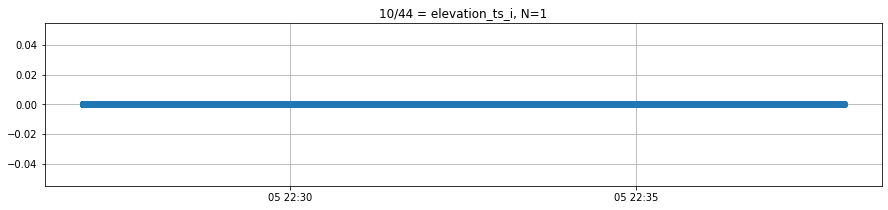

In [22]:
it = 10  
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() #0 means not received from DDS

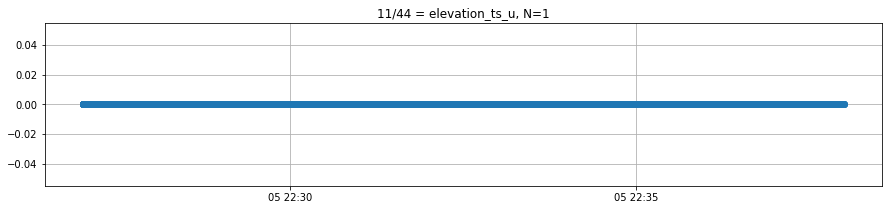

In [23]:
it = 11
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() #0 means not received from DDS

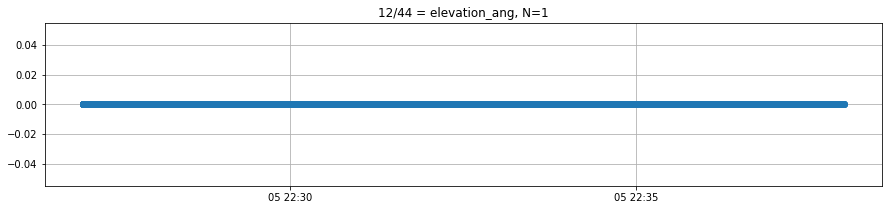

In [24]:
it = 12
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() #0 means not received from DDS

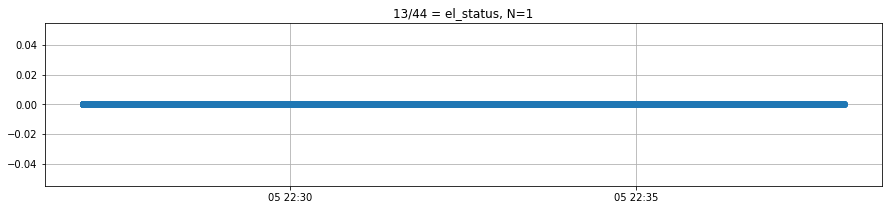

In [25]:
it = 13
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() #0 means not received from DDS

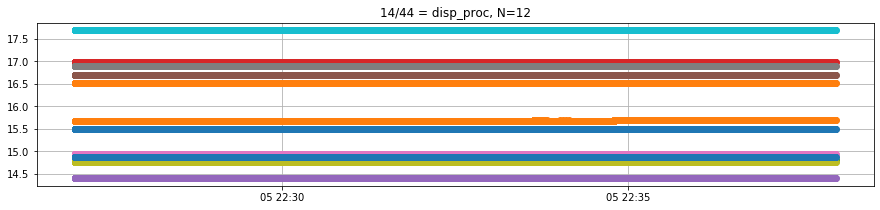

In [26]:
it = 14
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

#### disp_proc vs disp_sensors
* values seem the same, except disp_proc got rid of the unphysically large values
* unphysical values are marked by disp_status =1 below

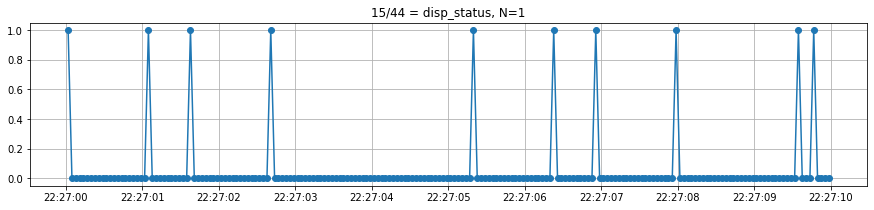

In [27]:
it = 15
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[tt], data[columns[it]][tt],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

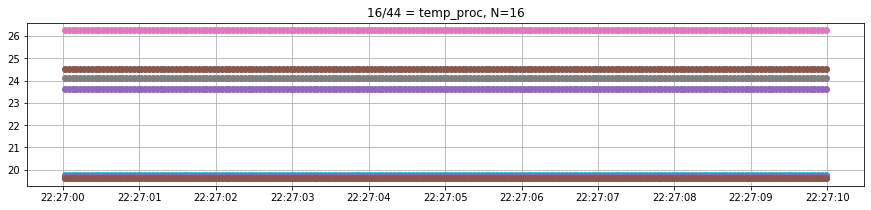

In [28]:
it = 16
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[tt], data[columns[it]][tt],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

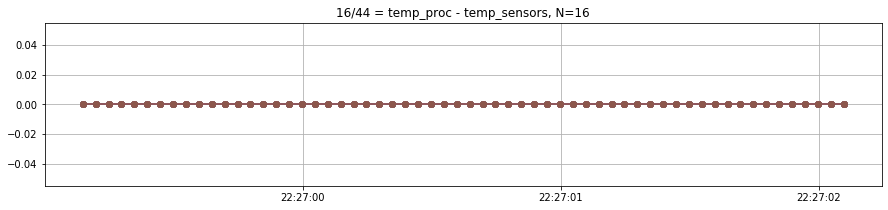

In [29]:
it = 16
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt]-data['temp_sensors'][ttt],'-o')
plt.title('%d/%d = %s - temp_sensors, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

#### temp_sensors = temp_proc, except when temp_status = 1

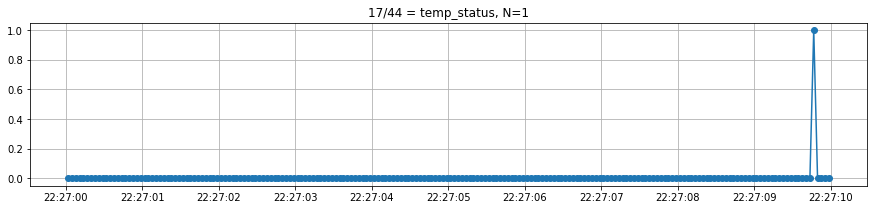

In [30]:
it = 17
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[tt], data[columns[it]][tt],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

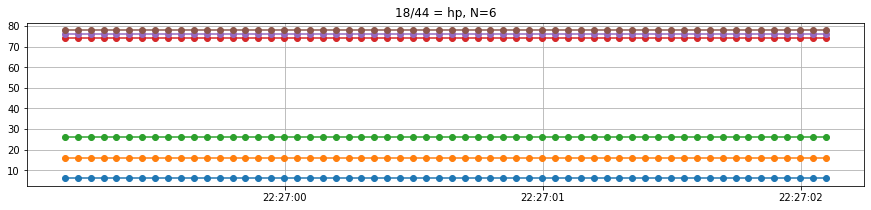

In [31]:
it = 18
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#These are just ID numbers

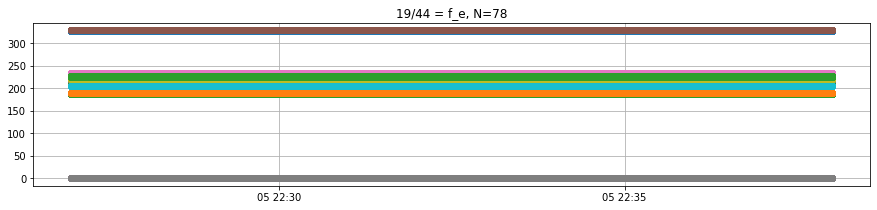

In [32]:
it = 19
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

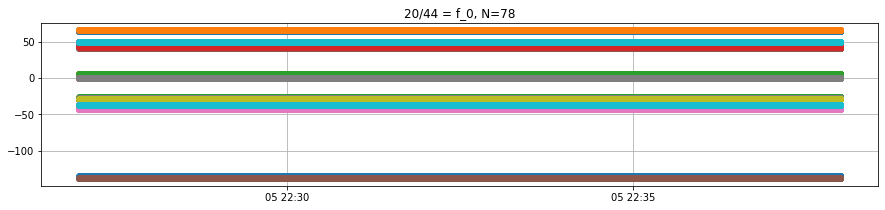

In [33]:
it = 20
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

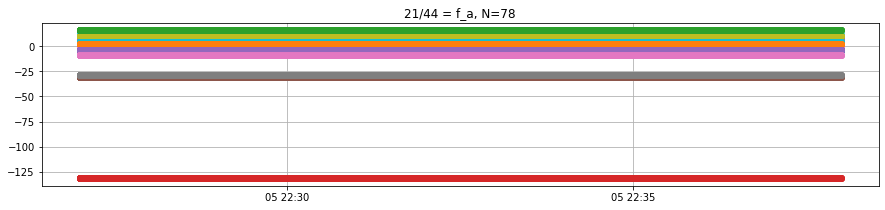

In [34]:
it = 21
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

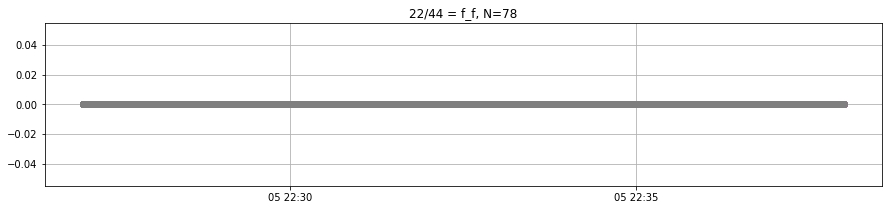

In [35]:
it = 22
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

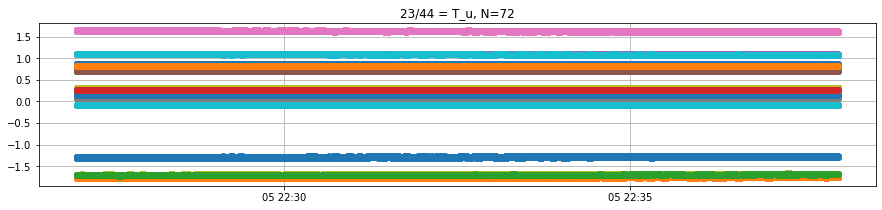

In [36]:
it = 23
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

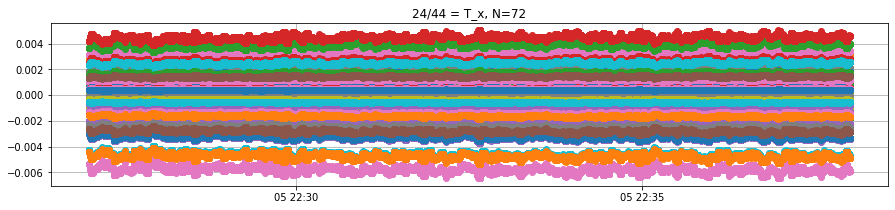

In [33]:
it = 24
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

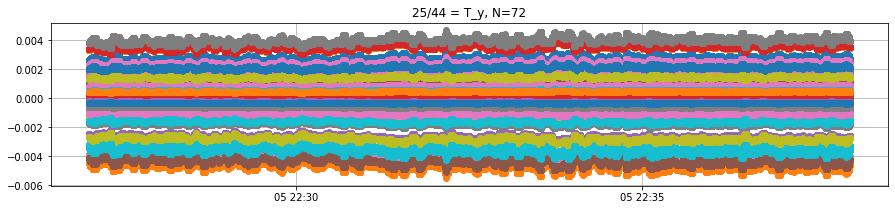

In [34]:
it = 25
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

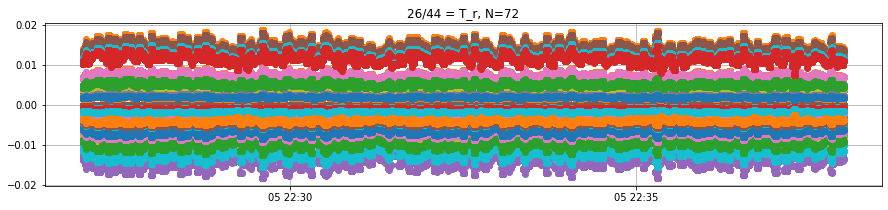

In [35]:
it = 26
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

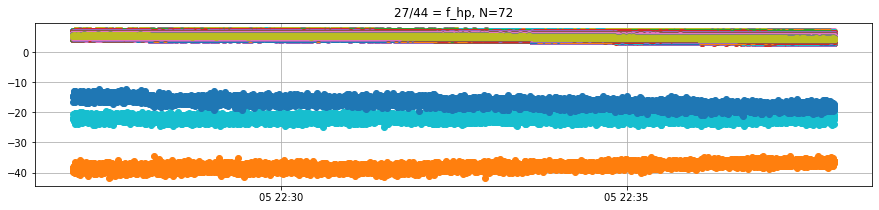

In [36]:
it = 27
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

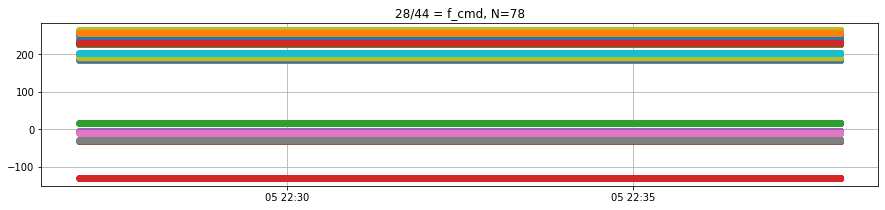

In [37]:
it = 28
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

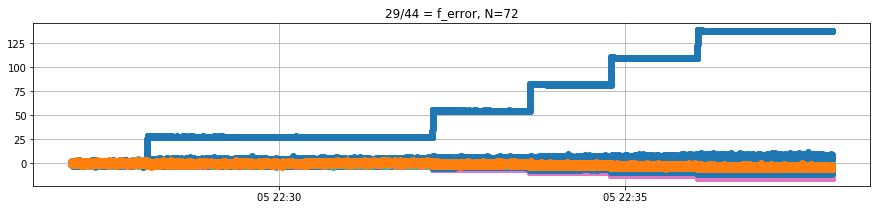

In [38]:
it = 29
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

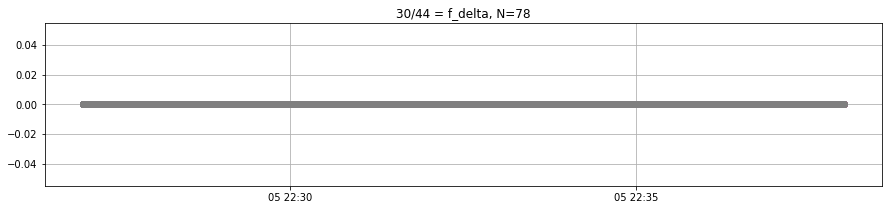

In [39]:
it = 30
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

#### f_cmd_wrd
Te-Wei's notes from Harris document says: 
Force control word indicating which forces are being used, and some control loop control line states

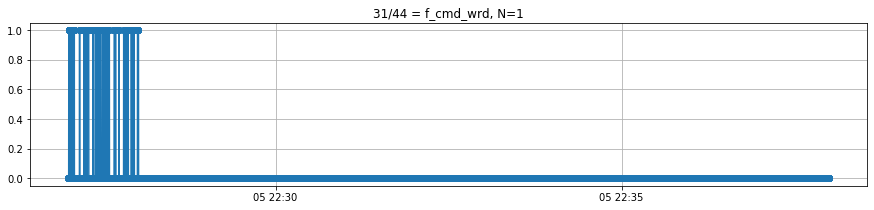

In [40]:
it = 31
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
# what is this?

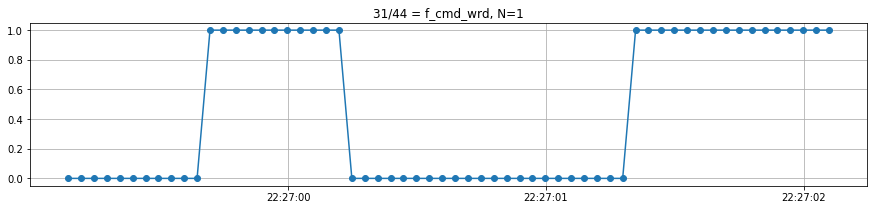

In [41]:
it = 31
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

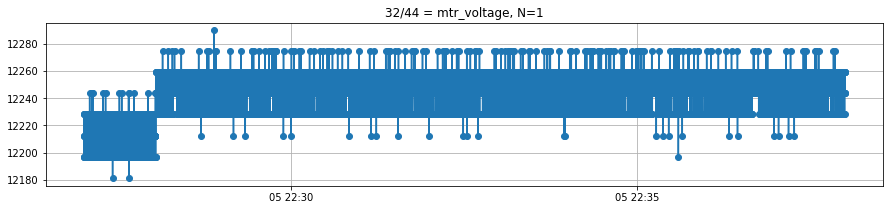

In [43]:
it = 32
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()  #motor voltage
#what is the unit?

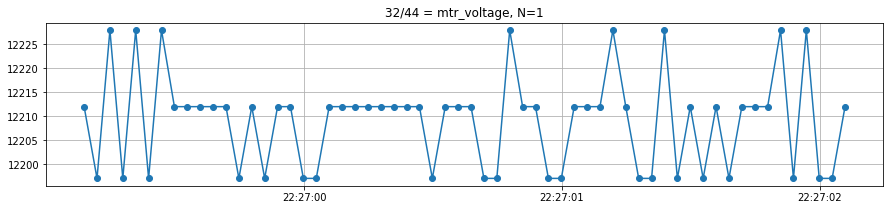

In [44]:
it = 32
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid()  #moter voltage

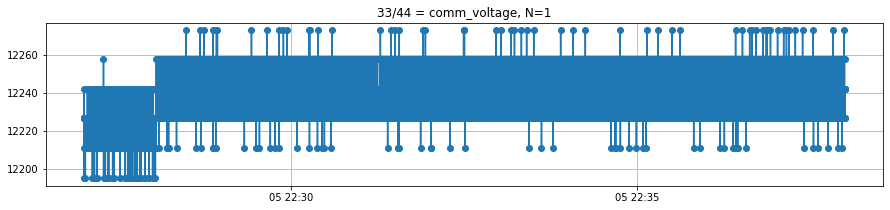

In [45]:
it = 33
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#what is the unit?

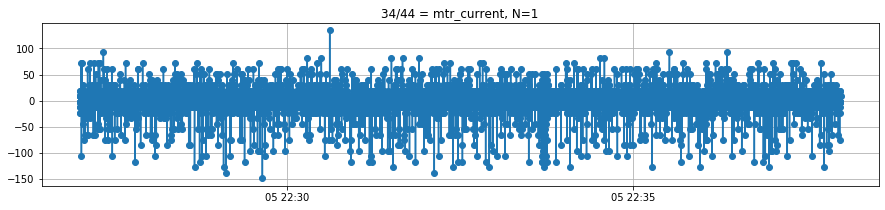

In [46]:
it = 34
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#what is the unit?

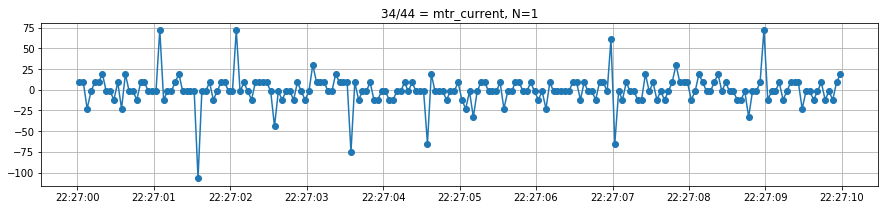

In [47]:
it = 34
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[tt], data[columns[it]][tt],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

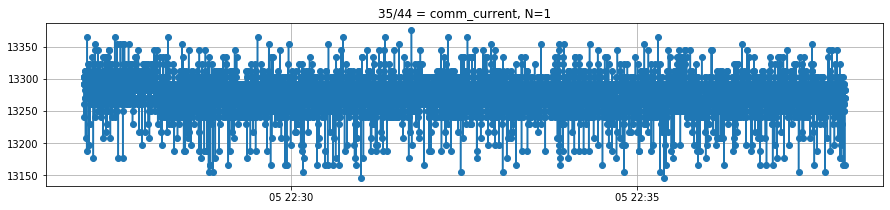

In [48]:
it = 35
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#what is the unit?

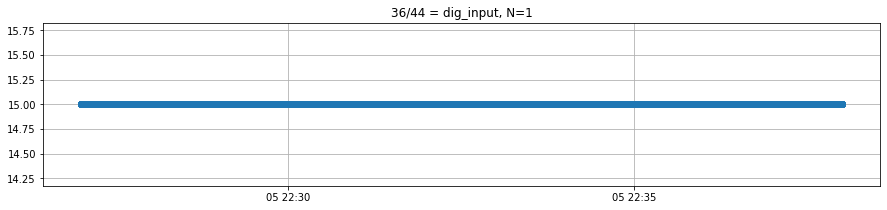

In [49]:
it = 36
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#what is this?

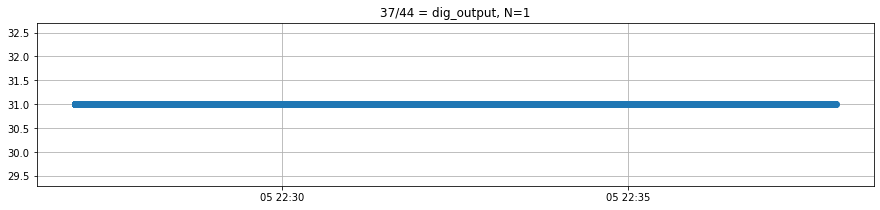

In [50]:
it = 37
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#what is this?

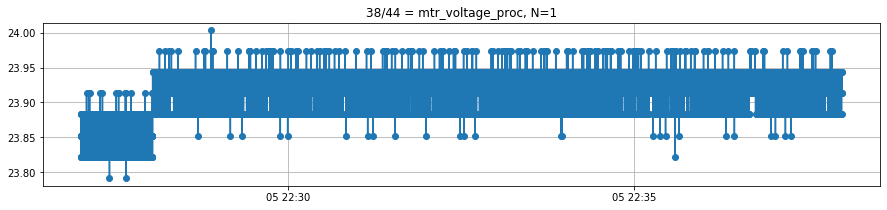

In [51]:
it = 38
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#unit must be volt. This makes better sense. 
#Do we need to keep the raw? 
#same question for other quantities, e.g., temp, inclinometer, disp sensors.

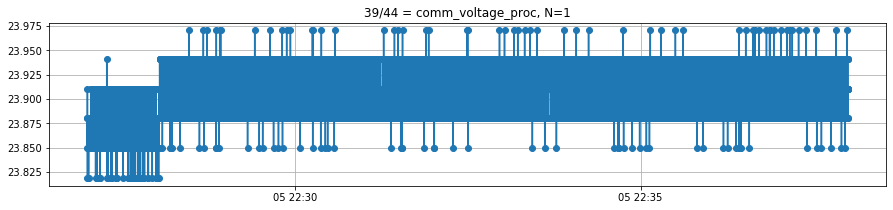

In [52]:
it = 39
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

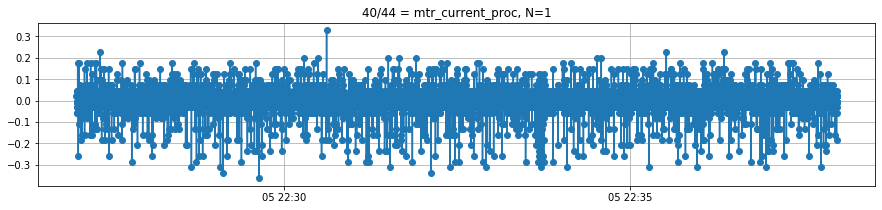

In [54]:
it = 40
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#unit must be amp? This makes better sense. 
#Do we need to keep the raw? 

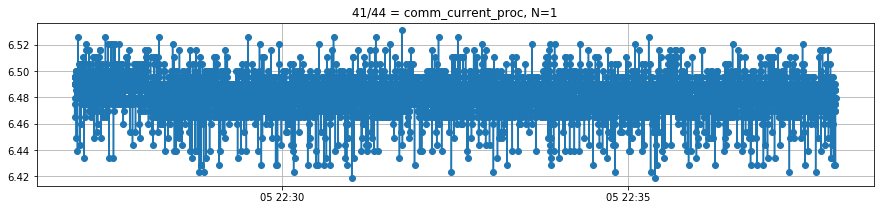

In [56]:
it = 41
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data[columns[it]],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 
#unit is amp?

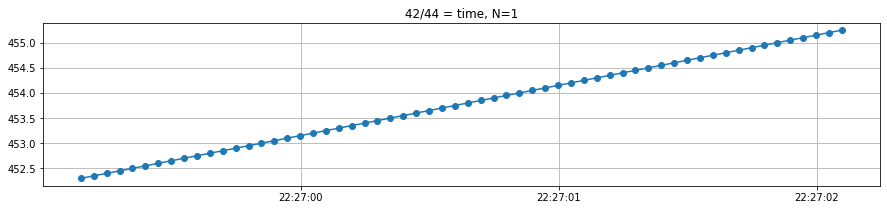

In [57]:
it = 42
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t[ttt], data[columns[it]][ttt],'-o')
plt.title('%d/%d = %s, N=%d'%(it, len(columns), columns[it], data[columns[it]][ttt,:].shape[1]))
plt.grid() 

In [58]:
#timestamps are strings, we cannot make a plot like the above. And it has been converted into t already.
it = 43
data[columns[it]]

array([[array(['05-Mar-2020 18:24:05.030'], dtype='<U24')],
       [array(['05-Mar-2020 18:24:05.080'], dtype='<U24')],
       [array(['05-Mar-2020 18:24:05.130'], dtype='<U24')],
       ...,
       [array(['05-Mar-2020 18:35:04.880'], dtype='<U24')],
       [array(['05-Mar-2020 18:35:04.930'], dtype='<U24')],
       [array(['05-Mar-2020 18:35:04.980'], dtype='<U24')]], dtype=object)